# <span style='color:teal'>Chemistry I</span>
## <span style='color:teal'>Course code: CH1101</span>
- Program: BTech Batch 2021
- Course Status: Core

## <span style='color:brown'>PLOTTING SPHERICAL HARMONICS IN 3D</span>
## <span style='color:brown'>Objectives</span>
- Plot spherical harmonics Y<sub>l,m</sub>(&theta;, &phi;) using [Python](https://www.python.org)
- Modify <span style='color:brown'><b>l</b></span> and <span style='color:brown'><b>m</b></span> values to plot an atomic orbital

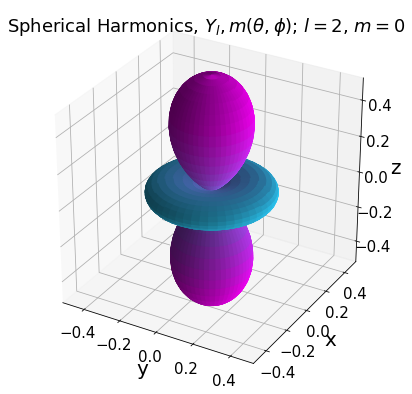

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
## Following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

#plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 15})

## Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
## Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
## Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonics of degree el and order m on Axes ax."""

    ## N.B. In SciPy's sph_harm function definitions are:
    ## azimuthal coordinate is theta, and polar coordinate is phi.
    ## The opposite convention is generally used in Quantum Mechanics
    Y = sph_harm(abs(m), el, phi, theta)

    ## Linear combinations of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    ## Color the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('cool'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)
    
    ax.set_title(r'Spherical Harmonics, $Y_l,m(\theta,\phi)$'+r'; $l=$'+str(l)+r', $m=$'+str(m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('on')
    ax.set_xlabel("y",fontsize=20)
    ax.set_ylabel("x",fontsize=20)
    ax.set_zlabel("z",fontsize=20)

    
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

## HERE, enter appropriate values of l and m
l, m = 2, 0
plot_Y(ax, l, m)